# Lab 2: Data Loading, Cleaning, and Exploration

In this lab, we will cover the following topics:
1. Data loading and cleaning
2. Handling missing data
3. Feature engineering examples
4. Visualizations/data exploration

Each section includes basic implementation and questions for further exploration.

## 1. Data Loading and Cleaning

We will start by loading and cleaning a dataset. We will also explore different techniques for data cleaning.

In [2]:
import functionals as f
import pandas as pd
import numpy as np

# Load the dataset
path_to_file = 'messy_data.csv'
data = pd.read_csv(path_to_file)

# Display dataset information
data.head()
data.info()
data.describe()

# Run the simple model
f.simple_model(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     1158 non-null   int64  
 1   deck         273 non-null    object 
 2   embarked     1155 non-null   object 
 3   pclass       1051 non-null   float64
 4   embark_town  1155 non-null   object 
 5   sex          1158 non-null   object 
 6   adult_male   1158 non-null   bool   
 7   who          1158 non-null   object 
 8   wspd         929 non-null    float64
 9   lfwa         929 non-null    float64
 10  class        1158 non-null   object 
 11  tprc         1158 non-null   float64
 12  sibsp        1044 non-null   float64
 13  age          829 non-null    float64
 14  alone        1158 non-null   bool   
 15  fare         1036 non-null   float64
 16  parch        1042 non-null   float64
dtypes: bool(2), float64(8), int64(1), object(6)
memory usage: 138.1+ KB
Accuracy: 0.7419354838

## Data Cleaning

We will clean the dataset by removing duplicates, fixing inconsistent entries and removing outliers.

In [10]:
from scipy import stats

# Remove duplicates
data_no_duplicates = data.copy().drop_duplicates()

# Fix inconsistent entries
data_format_fixed = data_no_duplicates.copy()
data_format_fixed['sex'] = data_format_fixed['sex'].apply(lambda x: 'female' if 'F' in x or 'f' in x else 'male')

data_cleaned = data_format_fixed.copy()

# # Check for outliers - if they exist, remove them
# numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# # Dataset with no duplicates, fixed format, missing values and outlier removed (if they exist)
# drop_columns = ['deck', '']
# data_final = data_no_duplicates.drop(columns=drop_columns, errors='ignore')
# andle missing values
# Drop columns with too many missing values
threshold = 0.7  # Keeping columns with at least 70% non-null values
data_format_fixed = data_format_fixed.loc[:, data_format_fixed.notnull().mean() >= threshold]

# Fill missing values for numerical columns with the median
numerical_columns = data_format_fixed.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data_format_fixed[col] = data_format_fixed[col].fillna(data_format_fixed[col].median())

# Fill missing values for categorical columns with the mode
categorical_columns = data_format_fixed.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_format_fixed[col] = data_format_fixed[col].fillna(data_format_fixed[col].mode()[0])

# 4. Remove outliers using Z-score
data_cleaned = data_format_fixed.copy()
for col in numerical_columns:
    z_scores = np.abs(stats.zscore(data_cleaned[col]))
    data_cleaned = data_cleaned[(z_scores < 3) | (pd.isnull(z_scores))]

# 5. Drop unnecessary columns
drop_columns = ['deck']  # Add any columns you want to drop
data_cleaned = data_cleaned.drop(columns=drop_columns, errors='ignore')

# Final cleaned dataset
data_final = data_cleaned.reset_index(drop=True)

# Display dataset summary after cleaning
data_final.info()

f.simple_model(data_final)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     96 non-null     int64  
 1   embarked     96 non-null     object 
 2   pclass       96 non-null     float64
 3   embark_town  96 non-null     object 
 4   sex          96 non-null     object 
 5   adult_male   96 non-null     bool   
 6   who          96 non-null     object 
 7   wspd         96 non-null     float64
 8   lfwa         96 non-null     float64
 9   class        96 non-null     object 
 10  tprc         96 non-null     float64
 11  sibsp        96 non-null     float64
 12  age          96 non-null     float64
 13  alone        96 non-null     bool   
 14  fare         96 non-null     float64
 15  parch        96 non-null     float64
dtypes: bool(2), float64(8), int64(1), object(5)
memory usage: 10.8+ KB
Accuracy: 0.7


### Questions for Exploration

1. How does the following affect model performance?
    * removing duplicates
    * fixing inconsistencies  
2. What other inconsistencies can you find and fix in the dataset?
3. How does the choice of dataset affect the data cleaning process?

## 2. Handling Missing Data

We will handle missing data by using different techniques such as imputation and deletion. We will also explore the impact of these techniques on the dataset.

In [15]:
# Identify missing values
# missing_data = data.isnull().sum()
# print(missing_data)

# # Impute missing values
# numerical_col_name = []
# categorical_col_name = []
# data['age'].fillna(data['age'].mean())
# data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# # Drop rows with missing values
# data.dropna()

# # Display the dataset after handling missing data
# data.info()

# Handle missing values using different techniques

# (a) Impute numerical columns using the mean
if 'age' in data.columns:
    data['age'] = data['age'].fillna(data['age'].mean())  # Impute with mean

# (b) Impute categorical columns using the mode
if 'embarked' in data.columns:
    data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])  # Impute with mode

# (c) Drop rows with missing values in specific columns (if necessary)
# Example: Drop rows where both 'age' and 'fare' are missing
data_dropped = data.dropna(subset=['age', 'fare'])

# (d) Drop rows with any missing values
data_all_dropped = data.dropna()

f.simple_model(data_dropped)

Accuracy: 0.7419354838709677


### Questions for Exploration

1. How does the following affect model performance:
    * imputation 
    * dropping rows with missing values
2. What happens to the model performance if you use different imputation techniques (e.g., median, mode)?
3. How does the choice of dataset affect the handling of missing data?

## 3. Feature Engineering Examples

Next, we will create new features from the existing ones. We will also explore different techniques for feature engineering.

In [4]:
# Create new features
data_new_features = data.copy()
data_new_features['family_size'] = data_new_features['sibsp'] + data_new_features['parch'] + 1
data_new_features['is_alone'] = (data_new_features['family_size'] == 1).astype(int)

# Any other features you can think of?

# Scale the numerical features
# <insert code here>

### Questions for Exploration

1. How do the new features affect model performance?
2. What other features can you create from the existing ones?
3. How does feature scaling (e.g., standardization, normalization) affect model performance? (Keep in mind that the data should be scaled **after** data splitting; this will require modifying the simple_model method in functionals.)

## 4. Visualizations/Data Exploration

We will visualize and explore the dataset using different techniques. We will also explore the impact of these visualizations on data interpretation.

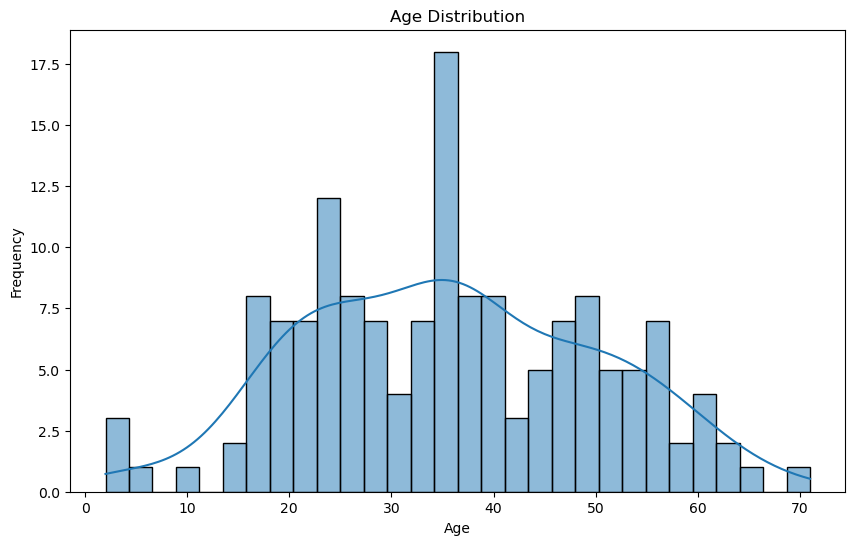

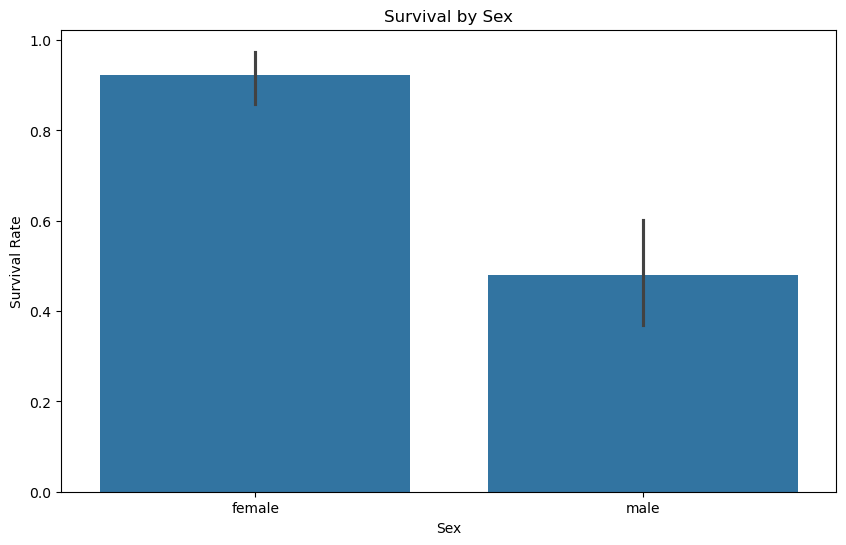

KeyError: "['family_size'] not in index"

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of survival by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=data)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Pair plot of numerical features
sns.pairplot(data[['age', 'fare', 'family_size', 'survived']], hue='survived')
plt.show()


### Questions for Exploration

1. How do the visualizations help in understanding the dataset?
2. What other visualizations can you create to explore the dataset?
3. How does the choice of visualization technique affect the interpretation of the data?

## Extensions

Explore other data preprocessing techniques such as:
- Encoding categorical variables (e.g., one-hot encoding, label encoding) - i.e., if you modify the simple_model method to only include numerical features, omitting the categorical variables
- Feature selection techniques (i.e., assessing inter-feature correlation and removing )

Compare their impact on the dataset and the performance of downstream machine learning models. 
Can you identify any sources of bias in the dataset?